# Note to users

Please enable GPU acceleration for this Colab notebook.

To do so, click 

`Edit > Notebook Settings`

and select

`Hardware Acceleration > GPU`



# Variational Autoencoder Tutorial

Jacob Kimmel -- [@jacobkimmel](http://jacobkimmel.github.io/)  
Produced as part of a Calico Computing tutorial series

# Agenda

1. Learning Latent Representations 
2. Variational Autoencoders (VAEs)
3. Link to Variational Inference
4. Building a VAE
5. Application of VAE to Cell Shape Modeling

# Goals & Ideal Take-aways

1. Non-linear latent representations can reveal organizing principles of biological data
2. Probabilistic latent representations have advantages over deterministic ones
3. All that is old is new again -- some of the coolest ideas in deep learning are reformulations of classical paradigms
4. You can build even a "complex" DNN in a few hours


# Colloquial Problem Statement

You're given some interesting, unlabeled data $X^{M \times N}$, where $M := \text{samples}$ and $N := \text{measurements}$.

A few interesting things you might want to do:

1. Uncover some low-dimensional representation of our high dimensional data
2. Generate random samples of data similar to $X$, i.e. for simulation



# Learning Compact Representations

Given high dimensional data $X^{M \times N}$, we often want to find some smaller number of dimensions $D$ that capture variation in our samples. 

These dimensions in $D$ may relate directly to underlying biological processes that generate structured variation in $X$ -- age, sex, drug treatment, disease condition, etc.

## Encoder-Decoder Models are one way to do this

An **encoder** maps $N$-dimensional $X$ to $D \lt N$ dimensions and a **decoder** maps $D$ dimensions back to $N$.

## PCA is a linear Encoder-Decoder

![PCA as an encoderdecoder](http://jacobkimmel.github.io/assets/images/vae_tutorial/pca_fig.png)

In PCA, the eigenvectors act as a linear "code" to map high dimensional $X$ to a lower dimensional space.

## Eigencells

For a data set of cell images we'll work with soon, you can imagine that PCA is "encoding" each image as a combination of eigencell images, where the eigencells are below.

![eigencells](http://jacobkimmel.github.io/assets/images/vae_tutorial/eigencells.png)

## Neural Networks can build *non-linear* Encoder-Decoders

![Neural network non-linear encoder decoder](http://jacobkimmel.github.io/assets/images/vae_tutorial/nn_enc_dec_fig.png)

One way to do this is an **Autoencoder.** 

An autoencoder encodes $X$ to latent dimensionality $D$ with one NN, and decodes it from $D$ to $X'$ with another. 

This is optimized by gradient descent on the NNs until the reconstructions $X'$ are similar to the inputs $X$.

## Problems with Autoencoders

1. AEs struggle to learn useful representations without regularization, introducing hyperparameters.
2. AE latent space is not necessarily continuous. This makes interpolation and sampling difficult.
3. AE latent spaces have no notion of variation. In noisy real world data, multiple latent states $z_i$ can generate the same observed $x_i = \text{Decoder}(z_i) + \text{noise}$.

![MNIST AE Space](http://jacobkimmel.github.io/assets/images/vae_tutorial/mnist_ae_space.png)

[Figure credit Irhum Shafkat](https://towardsdatascience.com/intuitively-understanding-variational-autoencoders-1bfe67eb5daf)

# Variational Autoencoders

VAEs reformulate the autoencoder probablistically. 

Instead of $\text{Encoder}(X) = Z$, we map $\text{Encoder}(X) = P(Z | X)$. Our reconstruction process is likewise probabilistic, estimating $P(X | Z)$.

We model the distribution of this latent space $Z$ explicitly with some prior $P(Z)$, like $P(Z) = \mathcal{N}(0,1)$.

![VAE Fig](http://jacobkimmel.github.io/assets/images/vae_tutorial/vae_fig.png)

## VAEs address some concerns of AEs

1. By enforcing a prior on $P(Z)$, we regularize the Encoder-Decoder.
2. Our latent space obeys the prior $P(Z)$, so it is continuous. We can interpolate and sample from it by sampling $P(Z)$.
3. We have a notion of variation in the mapping of $X \rightarrow P(Z | X)$ based on our prior $P(Z)$. For each sample $x_i$, we can evaluate the likelihood of multiple $z_i$, and corresponding decodings $\hat{x}_i$. 

![MNIST VAE](http://jacobkimmel.github.io/assets/images/vae_tutorial/mnist_vae_space.png)


[Figure credit Irhum Shafkat](https://towardsdatascience.com/intuitively-understanding-variational-autoencoders-1bfe67eb5daf)

# Why is this cool?

Let's assume we have images throughout different phases of the cell cycle.

**(1) Assess the amount of variation in a given sample $X_i$**

A cell shape $X_i$ with high variation in $P(Z | X)$ may be observable in multiple CC states or have low confidence mapping (for instance, if an $X_i$ is an anomaly unseen during training), whereas an $X_i$ with low variation may specifically and confidently map to a single CC state.

**(2) Interpolate between latent states**

Since our latent space $Z$ is continuous, we can use vector addition to interpolate between samples. 

$$z_\text{Metaphase} = \frac{1}{2}(z_\text{Prophase} + z_\text{Anaphase})$$

We can also interpolate at points along $Z$ and decode to gain an understading of each dimension in $Z$.

**(3) Generate random samples of $\hat X$**

We can generate samples of $\hat X \approx X$ simply by sampling $Z \sim P(Z)$ and decoding the values.

## VAE applications in biology

[Learning integrated representations of cell geometry](https://www.biorxiv.org/content/biorxiv/early/2017/12/21/238378.full.pdf)

Single cell RNA-sequencing dimensionality reduction ([1](https://www.biorxiv.org/content/early/2018/05/16/318295.full.pdf+html) & [2](https://www.nature.com/articles/s41467-018-04368-5))

[Dimensionality reduction and latent feature inference for The Cancer Genome Atlas](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5728678/)

# Motivating a VAE through Variational Inference

Given some data $X^{M \times N}$ generated by an unknown distribution $P(X)$, find a probabilistic map $X \rightarrow Z$, $P(Z | X) \approx P(Z)$.

## This allows us to:

* Develop understanding of the latent variables $z$ underlying $P(X)$
* Generate random samples of $X$ with some notion of relation to one another

## What's an inuitive example here?

If the data $x^{M \times N} \in X$ are images of cell cytoskeletons, each pixel in $x$ is a dimension, so we have $M \times N$ dimensions!

These pixels will obviously be related to one another. If the overall shape of a cell is round, then the pixels on the left side and right side of the image should both reflect this. Likewise, if the cell is overall stellate, the top and bottom should both reflect this. On a dimension to dimension level, these relationships can be incredibly complex ($(M \times N)^2$ relationships!).

These relationships may be more intelligently represented as a latent space $z$, which defines overall cellular shapes, such that some values of $z$ are round cells, some are stellate, some are spindly, &c. Given a "decision" in this space $z$, the individual dimensions of $x$ can be inferred with relation to $z$.




# How might we structure such a model?

We effectively want to build our $P_{guess}(X)$ as a joint with a latent space $P(X, Z)$. If we set a prior on $P(Z)$, we can approach this as an approximate inference problem.

1. Define some parameteric PDF $P(Z)$ from which to sample latent variables. Usually a nice Gaussian.
2. Define a function $f(Z; \theta): X \times \Theta \rightarrow Z $ where $\theta \in \Theta$ are parameters of the model function $f$.
3. Optimize $\theta$ so that when we sample from $P(z)$, the outputs of $f$ are similar to data in $X$. i.e. We hope that $f(P(Z); \theta) \approx P(X)$.
4. Using this frame, our view of the world is that a joint probability distribution governs our data:

$$P(X, Z) = P(X | Z) P(Z)$$

5. Inference from our model would proceed by estimating likely latent values of $Z$ given $X$, i.e. the posterior $P(Z | X)$. How could we compute this? From Bayes:

$$P(Z | X) = \frac{P(X|Z) P(Z)}{P(X)}$$

$P(X | Z)$ can be modeled by our function $f(Z; \theta)$. 

$P(Z)$ we know, since we defined it as a parametric distribution.

This $P(X)$ thing though...

$$P(X) = \int{ P(X|Z)P(Z) dZ}$$

but that's not tractable in many cases.

Okay so we need to 

6. Approximate the posterior $P(Z | X)$. 

We are now in the realm of approximate inference!


## Multiple ways to do this

* Most classically, Markov Chain Monte Carlo (MCMC)
* *Variational inference* offers an alternative to MCMC that is less expensive in some cases


## Variational Inference is one way to do this

In VI, we approximate a conditional density of our latent variables $Z$ conditioned on our data $X$, $p(Z | X)$. 

This is done by searching a family of distributions $q(Z | X) \in Q$ which may approximate $p(Z | X)$. 

Variation autoencoders (VAEs) are effectively a special case of the variational inference (VI) problem. For a better treatment of Variational Inference in general, see [here](https://arxiv.org/abs/1601.00670).

We can use the ability of our model to generate guesses of our data $\hat X$ that look like the real $X$ as a metric of the performance of a given $q_\phi$ to model a real latent space.


# Variational Autoencoders

The key idea with VAEs is to use flexible parametric functions for $q(z | x)$ and $p(x | z)$ with auto-encoding as an objective function to fit them. 

![VAE diagram](https://jacobkimmel.github.io/assets/images/vae_fig.png)

1. Is $q(Z | X) \approx p(Z)$?
2. Is $X_{\text{in}} \approx X_{\text{rec}}$?


## How do we find $q(Z | X) \approx p(Z | X)$?

We **can't** do this directly by computing the KL divergence since:

$$\mathbf{KL} (q(Zz | X) || p(Z| X))$$ 

requires us to compute $\log p(x)$. 

To see this, we can expand out the KL.

$$\mathbf{KL}(q (Z | X) || p(Z | X)) = \textbf{E}[\log q(Z | X)] - \textbf{E}[\log p(Z | X)]$$
$$\mathbf{KL}(q (Z | X) || p(z | X)) = \textbf{E}[\log q(Z | X)] - \textbf{E}[\log p(X, Z)] + \log p(X)$$

And there's the $\log p(X)$ at the end!

## Getting to know the ELBO

Instead, we optimize the **evidence lower bound (ELBO)**.

$$\textbf{ELBO}(q) = \mathbf{E}[\log p(x | z)] - \mathbf{KL} (q(z | X) || p(z))$$

It [can be shown](https://arxiv.org/abs/1601.00670) that maximizing the ELBO is equivalent to minimizing the KL up to a constant. 

The **ELBO** is a *lower bound* on the probability of our evidence $\log p(X)$ because

$$\log p(X) = \textbf{KL}(q(z | X) || p(z | X)) + ELBO(q)$$

and the KL divergence is non-negative, so it *lower bounds* $\log p(X)$.

The ELBO places probability mass in $q(z | X)$ in two places:

1. Configurations of $q(z | X)$ that maxmize the likelihood of our evidence $p(x | z)$
2. Around the density of our prior, $p(z)$ (that nice Gaussian from before)


# Variational Autoencoders (VAE)

The ELBO loss is actually the same thing we use to optimize a VAE. Written a bit more neural net-y:

$$\mathbf{Loss}(x_i) = -\mathbf{E}[\log p_{decoder}(x_i | z)] + \mathbf{KL} (q_{encoder}(z | x_i) || p(z))$$

we see we're optimizing the negative log likelihood of our decoder output and "regularizing" with the KL divergence of our encoder $q(z | x_i)$'s output against a prior $p(z) \sim \mathcal{N(0, 1)}$.

In NN terms, we'll build our encoder $q_{encoder}(z | x_i)$ to output a mean $\mu$ and variance $\sigma^2$ for each dimension $z_j \in z$ given a data input $x_i$. 

We retain this probabilistic mindset in the decoder portion, $p_{decoder}(x_i | z)$ with an output $\hat x_i$. Each dimension $x_{ij} \in x_i$ will be considered a parameter to the Bernoulli distribution. We can enforce the constraints of the Bernoulli parameter by using a sigmoid function $\sigma(p_{decoder}(x_i | z))$ to squash our output in the range $[0, 1]$. Our full model of $P(X | Z)$ also includes the reparameterization trick, in addition to the deterministic NN.

## Practicalities

### Loss Function

The reconstruction loss $-\mathbf{E}[\log p_{decoder}(x_i | z)]$ is typically set to the Binary Cross Entropy of your input $x_i$ where all the dimensions in $x_i$ (pixels if it's an image) are in the range $[0, 1]$. 

To ensure the output is able to map to parameters of a Bernoulli (i.e. $[0, 1]$, most folks apply a sigmoid activation $\sigma(x)$ to the last layer.

The KL divergence $ \mathbf{KL} (q_{encoder}(z | x_i) || p(z))$ is defined analytically if both $q_{encoder}(z | x_i)$ and $p(z)$ are Gaussian, so that's by far the most common parameterization. 

The analytical solution is [derived here in appendix B](https://arxiv.org/pdf/1312.6114.pdf):

$$\frac{1}{2} \sum_{j=1}^J {(1 + \log \sigma_j^2) - \mu_j^2 - \sigma_j^2}$$

In code, the loss is then usually something simple like 

```python
KLD = sum((1+logvar) - mu**2 - exp(logvar))
loss = binary_cross_entropy(x_i, x_reconstructed) + KLD
```

### Encoder/Decoder

The encoder and decoder portions of published VAE models often use LeakyReLUs or PReLUs instead of vanilla ReLU. Empirically, practicioners observe that this helps avoid the vanishing gradient / dead ReLU problem. LeakyReLU and PReLU both let a little bit of signal through when $x < 0$ by applying $\max(ax, x)$ where $a < 0$ and small, rather than the vanilla ReLU $\max(0, x)$.

### Latent Dimensionality

Latent dimensionalities are somewhat arbitrary. The larger the latent dimensionality, the better the reconstruction but sometimes you lose semantic interpretation of the dimensions. 

In practice, many folks use latent dimensionalities of $2$ or $3$ to allow for visualization of the latent space. This allows you to gain semantic understanding of what the latent space is doing, and also allows you to make cool plots.

### Training

As with training all neural networks, setting your learning rate appropriately and using the right optimization scheme can make all the difference. When in doubt, lower the learning rate and wait longer.

# Example

We'll build a VAE to learn the distribution of cell actin cytoskeleton morphologies. 

To do this, we'll start with data generated by our friends at the Allen Institute for Cell Science, as recently described in a paper from their Modeling group [2]. The data has been pre-preprared for this tutorial by splitting off other cellular structures, isolating just images of labeled $\beta$-actin, illuminating the cytoskeleton.


In [0]:
!pip3 install http://download.pytorch.org/whl/cu80/torch-0.4.0-cp36-cp36m-linux_x86_64.whl
!pip3 install torchvision
!pip3 install image
!pip3 install networkx wget scikit-image
!pip3 install Pillow==4.1.1
# imports
import numpy as np
import pandas as pd
from PIL import Image
from skimage.io import imread
from skimage.filters import gaussian
import os
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white') # remove annoying colab defaults
sns.set_palette('muted')

import torch
import torch.nn as nn
from torch.utils.data import DataLoader

seed = 397
np.random.seed(seed)

# load dataset
import wget
import tarfile
import glob

if not os.path.exists('bactin_only.tar.gz'):
  link = 'https://github.com/jacobkimmel/jacobkimmel.github.io/raw/master/assets/files/bactin_only.tar.gz'
  wget.download(link)
  tar = tarfile.open("bactin_only.tar.gz")
  tar.extractall()
imgs = sorted(glob.glob('bactin_only/*'))

# check we have a GPU accelerator
print('GPU? : ', torch.cuda.is_available())

GPU? :  True


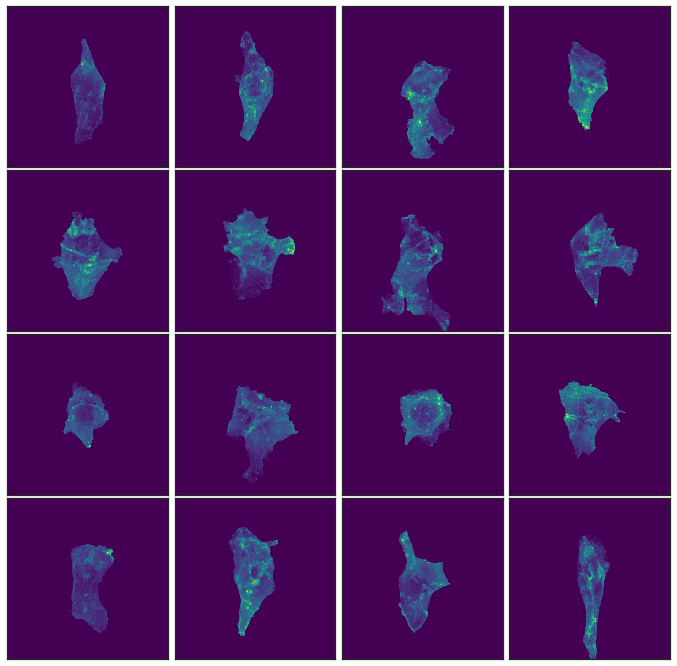

In [0]:
# Visualize our data
fig, ax = plt.subplots(4,4, figsize=(12,12))
fig.subplots_adjust(hspace=0.020, wspace=0.00005) # rm space between subplots
for i, j in enumerate(range(16,32)):
  I = np.array(Image.open(imgs[j]))
  ax[i//4, i%4].imshow(I[150:-150,150:-150], cmap='viridis')
  ax[i//4, i%4].set_xticks([])
  ax[i//4, i%4].set_yticks([]) # remove indices

In [0]:
print('Image dimensions: ', I.shape)
print('Image range: ', I.min(), I.max())

Image dimensions:  (753, 753)
Image range:  0 255


**N.B.** The cells in the data set are padded with lots of empty space. We can safely crop many pixels away.

We see that our cells are all different shapes. Learning a distribution of these shapes is somewhat obviously non-trivial. As the world's simplest possible expectation for any given cell, we could ask what the "mean" cell looks like.

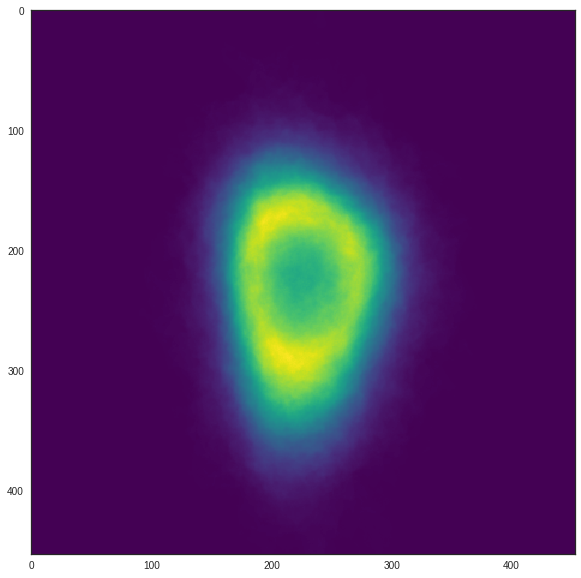

In [0]:
M = np.zeros_like(I, dtype='float64')
for i in range(len(imgs)):
  M += np.array(Image.open(imgs[i]))
  
plt.figure(None, (10,10))
plt.imshow(M[150:-150, 150:-150]/len(imgs), cmap='viridis') 

As expected our mean cell doesn't seem representative of cells in the data set, at least based on the above sample.



## Data Preparation

Let's build a data loader and associated transforms to crop and downsample our images for us.

Why are we downsampling you ask? 

This is mostly for the sake of pedagogy -- the networks will train faster and play nicer on `colab` if we make the input data smaller.

In [0]:
from torch.utils.data import Dataset
from torchvision.transforms import Compose
import glob
import os
import os.path as osp
from scipy.misc import imresize

class CellDataset(Dataset):
    '''Cell Segmentation Dataset'''

    def __init__(self, imgs, transform=None):
        '''
        Parameters
        ----------
        imgs : iterable of image paths.
        transform : callable. Optional transformer for samples.
        '''
        self.imgs = sorted(imgs)
        self.transform = transform
        
    def __len__(self):
        return len(self.imgs)

    def _imload(self, imp):
        '''Load images using PIL or skimage.io'''
        if imp[-4:] == '.tif':
            image = np.array(Image.open(imp))
        else:
            image = imread(imp)
        return image

    def __getitem__(self, idx):
        image = self._imload(self.imgs[idx])

        # expand dimensions if necessary
        if len(image.shape) < 3:
            image = np.expand_dims(image, -1)

        sample = {'image':image}

        if self.transform:
            sample = self.transform(sample)

        return sample
      
class ToTensor(object):
    '''Convert ndarrays in sample to Tensors'''

    def __init__(self, type='float'):
        self.type = type

    def __call__(self, sample):
        image = sample['image']

        # swap color axis because
        # numpy image: H x W x C
        # torch image: C X H X W
        image = image.transpose((2, 0, 1)).astype('float64')
        return {'image': torch.from_numpy(image).float(),}

class RescaleUnit(object):
    '''Rescales images to unit range [0,1]'''

    def __call__(self, sample):
        image = sample['image']
        image = image - image.min() # set min = 0
        image = image / image.max() # max / max = 1
        sample = {'image':image}
        return sample
      
class Resize(object):
    '''Resizes images'''

    def __init__(self, size=(512, 512, 1)):
        self.sz = size

    def __call__(self, sample):
        image = sample['image']

        if len(image.shape) == 2:
            imageP = Image.fromarray(image.squeeze())
            imageR = np.array(imageP.resize(self.sz[:2]))
        else:
            chans = []
            for c in range(image.shape[-1]):
                chanP = Image.fromarray(image[...,c].squeeze())
                chanR = np.array(chanP.resize(self.sz[:2]))
                chans.append(chanR)
            imageR = np.squeeze(np.stack(chans, axis=-1))
            
        if len(imageR.shape) < 3:
            imageR = np.expand_dims(imageR, -1)

        return {'image':imageR}
      
class Crop(object):
    '''Crops images'''

    def __init__(self, crop=(100,100)):
        self.crop = crop

    def __call__(self, sample):
        image = sample['image']
        return {'image':image[self.crop[0]:-self.crop[0],
                              self.crop[1]:-self.crop[1], :]}
      
class Blur(object):
  '''Blurs an image'''
  def __init__(self, sigma: float=3.):
    self.sigma = sigma
  
  def __call__(self, sample):
    image = sample['image']
    image = gaussian(image, self.sigma)
    return {'image':image}


Let's visualize some of our downsampled and rescaled outputs to get an idea of what the cells look like after we've shrunk and cropped them.

We smooth the images a little bit with a Gaussian blur to ameliorate the graininess from downsampling. Feel free to remove it if you prefer.

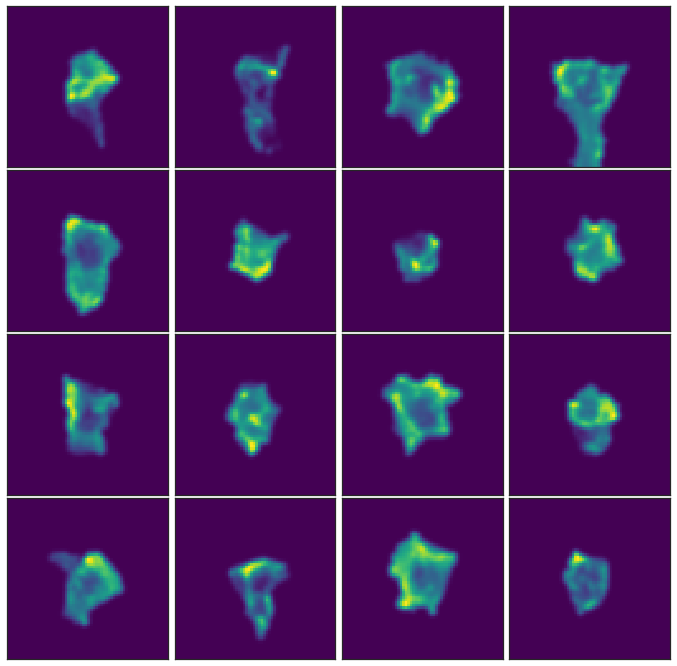

In [0]:
cds = CellDataset(imgs, 
                  transform=Compose([Crop(crop=(151,151)),
                                     Resize(size=(64,64,1)),
                                     Blur(sigma=1.), # make the images less grainy
                                     RescaleUnit(),
                                     ToTensor()]))


fig, ax = plt.subplots(4,4, figsize=(12,12))
fig.subplots_adjust(hspace=0.020, wspace=0.00005) # rm space between subplots

# rerun this block to randomly sample new cells for visualization
for i,j in enumerate(np.random.choice(np.arange(len(imgs)), size=16, replace=False)):
  I = cds[j]['image']
  ax[i//4, i%4].imshow(I.squeeze().numpy(), cmap='viridis')
  ax[i//4, i%4].set_xticks([])
  ax[i//4, i%4].set_yticks([]) # remove indices

## Define a Model

We'll define our model as a simple neural network. Here, we use a simple linear network for the ease of expression, but a convolutional alternative is included at the end of the tutorial.

In [0]:
# Define our model

from torch.utils.data import DataLoader
from torch import nn, optim
from torch.nn import functional as F
from torchvision import transforms
from torchvision.utils import save_image

import os
if not os.path.exists('results'):
  os.mkdir('results')

cuda = True
batch_size = 64
log_interval = 10000
# we should see reasonable looking outputs by 300 epochs
# full convergence should take ~600-1000 epochs
# this will take ~90-120 mins to train denovo
epochs = 600 
n_latent_dim = 2 # usually we'd use more dims; 2 is nice for visualization :)

class VAE(nn.Module):
    def __init__(self, n_latent: int):
        super(VAE, self).__init__()

        self.fc11 = nn.Linear(64**2, 1024)
        self.fc12 = nn.Linear(1024, 1024)
        self.fc21 = nn.Linear(1024, n_latent)
        self.fc22 = nn.Linear(1024, n_latent)
        self.fc31 = nn.Linear(n_latent, 1024)
        self.fc32 = nn.Linear(1024, 1024)
        self.fc4 = nn.Linear(1024, 64**2)

    def encode(self, x):
        # We use Leaky ReLUs here to prevent the "dying ReLU" problem.
        # ReLU := max(0, x)
        # This happens if an update throws our raw output `x << 0`.
        # In that regime, no small update to `x` passes through the ReLU!.
        # LeakyReLU := max(ax, x) where `a < 0` and small.
        # This can help ameliorate this issue, though it's somewhat empirical.
        # PReLU is actually the same idea, they just make `a` a learnable parameter.
        h1 = F.leaky_relu(self.fc11(x.view(-1, 64**2)))
        h1 = F.leaky_relu(self.fc12(h1))
        return self.fc21(h1), self.fc22(h1)

    def reparameterize(self, mu, logvar):
        '''Implements the reparameterization trick.
        
        Parameters
        ----------
        mu : torch.Tensor
          [Batch, Dim] encoded means of latent variables.
        logvar : torch.Tensor
          [Batch, Dim] encoded log(variance) of latent variables.
        
        Returns
        -------
        z : torch.Tensor
          the encoded latent variable representation.
        
        Notes
        -----
        What's the reparameterization trick?
        
        can't take the derivative of a random variable `z`
        so, set z := g(epsilon, x)
        here g is a link function and we assume `z` has the form of a unit 
        Gaussian, so epsilon ~ \mathbb{N}(0, 1)
        z = mu (calculated from x) + epsilon*sigma
        we can take gradient on the deterministic portion of z
        
        Why log variance?
        Keeping the variance in log space allows it to be more flexible without
        requiring large weights (plays well with regularization). It also 
        means negative values aren't non-sensical.
        '''
        if self.training:
            std = torch.exp(0.5*logvar)
            eps = torch.randn_like(std)
            return eps.mul(std).add_(mu)
        else:
            return mu

    def decode(self, z):
        h3 = F.leaky_relu(self.fc31(z))
        h3 = F.leaky_relu(self.fc32(h3))
        return F.sigmoid(self.fc4(h3))

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

model = VAE(n_latent=n_latent_dim).cuda()

# We use an adaptive optimizer (Adam) since it's less sensitive to hyperparameters.
# Generally, fine-tuned SGD with a learning schedule and momentum may work better 
# than an adaptive method like Adam.
# In practice, using Adadelta or Adam is a good first pass if you don't want to mess with 
# learning rates too much.
# If you swap in SGD and don't tune the learning rate, 
# it may not do as well right off the bat.
optimizer = optim.Adam(model.parameters(), lr=1e-3)


# Reconstruction + KL divergence losses summed over all elements and batch
def loss_function(recon_x, x, mu, logvar):
    BCE = F.binary_cross_entropy(recon_x.view(-1), x.view(-1), 
                                 size_average=False)

    # see VAE paper
    # https://arxiv.org/abs/1312.6114
    # This is the analytical derivation for 
    # KL( q(z | x_i) | p(z) )
    # when both q(z | x_i) and p(z) are unit Gaussian
    # 0.5 * sum(1 + log(sigma**2) - mu**2 - sigma**2)
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    return BCE + KLD



[Skip & use pre-trained model if desired](#scrollTo=KK3UhsnEoBoD)

In [0]:
train_loader = DataLoader(cds, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = train_loader
  
def train(epoch):
    model.train()
    train_loss = 0
    for batch_idx, data in enumerate(train_loader):
        data = data['image'].cuda() # put data on the GPU
        data.requires_grad = True # make sure we store the gradients
        
        optimizer.zero_grad() # 0 out gradients from last backprop
        recon_batch, mu, logvar = model(data.view(-1, 64**2)) # forward pass!
        loss = loss_function(recon_batch, data.detach(), mu, logvar) # loss calculation
        loss.backward() # backprop!
        train_loss += loss.item()
        optimizer.step() # update parameters

        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader),
                loss.item() / len(data)))

    print('====> Epoch: {} Average loss: {:.4f}'.format(
          epoch, train_loss / len(train_loader.dataset)))


def test(epoch):
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for i, data in enumerate(test_loader):
            data = data['image'].cuda()
            recon_batch, mu, logvar = model(data.view(-1, 64**2))
            test_loss += loss_function(recon_batch, data.detach(), mu, logvar).item()

    test_loss /= len(test_loader.dataset)
    print('====> Test set loss: {:.4f}'.format(test_loss))


for epoch in range(1, epochs + 1):
    train(epoch)
    test(epoch)
    if epoch % 10 != 0 and epoch != 1:
      continue
    with torch.no_grad():
        data = next(iter(train_loader))
        data = data['image'].cuda()
        output, mu, sd = model(data)
        
        fig, ax = plt.subplots(2, 4, figsize=(12,6))
        for i in range(4):
          ax[0, i%4].imshow(data.cpu().squeeze().numpy()[i,...], 
                           cmap='viridis')
          ax[1, i%4].imshow(output.cpu().view(batch_size, 1, 64, 64).squeeze().numpy()[i,...], 
                             cmap='viridis')
        plt.show()


torch.save(model.state_dict(), 'model_weights.pkl')

## Results

We find that our model rapidly learns to predict the "mean cell," and later refines this baseline estimate to capture variation in the input.

In the example we present here, the VAE is constrained to use a 2-dimensional latent representation. As a result, the generated images aren't quite convincing!

![Training 0](http://jacobkimmel.github.io/assets/images/vae_tutorial/viz0.gif)
![Training 1](http://jacobkimmel.github.io/assets/images/vae_tutorial/viz1.gif)


### Further Exploration

Play with the number of latent dimensions yourself to see that increasing the size of the latent space can produce realistic images. 

i.e. try setting `n_latent_dims = 64`

Also try playing with the resolution in the model. If you alter the `Resize()` element of the dataset, as well as the corresponding sizes in the network you can generate much more detailed images.

In [0]:
# save model weights to your GDrive if desired
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# PyDrive reference:
# https://gsuitedevs.github.io/PyDrive/docs/build/html/index.html

# 2. Create & upload a file text file.
uploaded = drive.CreateFile({'title': 'vae_tut_weights.pkl'})
uploaded.SetContentFile('model_weights.pkl')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

## Sampling from $q(z)$

### Visualize the latent space $z$

We know have an estimate $q(z)$ for $p(z | x)$. Since we conditioned $q(z)$ to fit a Gaussian prior $p(z) \sim \mathcal{N}(0, 1)$, we know it resembles a $d$-dimensional unit Gaussian we can sample from.

Here, we'll randomly sample from our $P_{est}(X)$ by randomly sampling $z \sim \mathcal{N}(0,1)$ and decoding it with $p_{decoder}(x_i | z)$.

In [0]:
# Download pre-trained model weights

if not os.path.exists('model_weights_2dim.pkl'):
  link = 'https://github.com/jacobkimmel/jacobkimmel.github.io/raw/master/assets/files/model_weights_2dim.pkl'
  wget.download(link)

model = VAE(n_latent=2)
model.load_state_dict(torch.load('model_weights_2dim.pkl'))
model = model.cuda()
model = model.eval() # place model in eval mode

torch.Size([81, 1, 64, 64])


([], <a list of 0 Text yticklabel objects>)

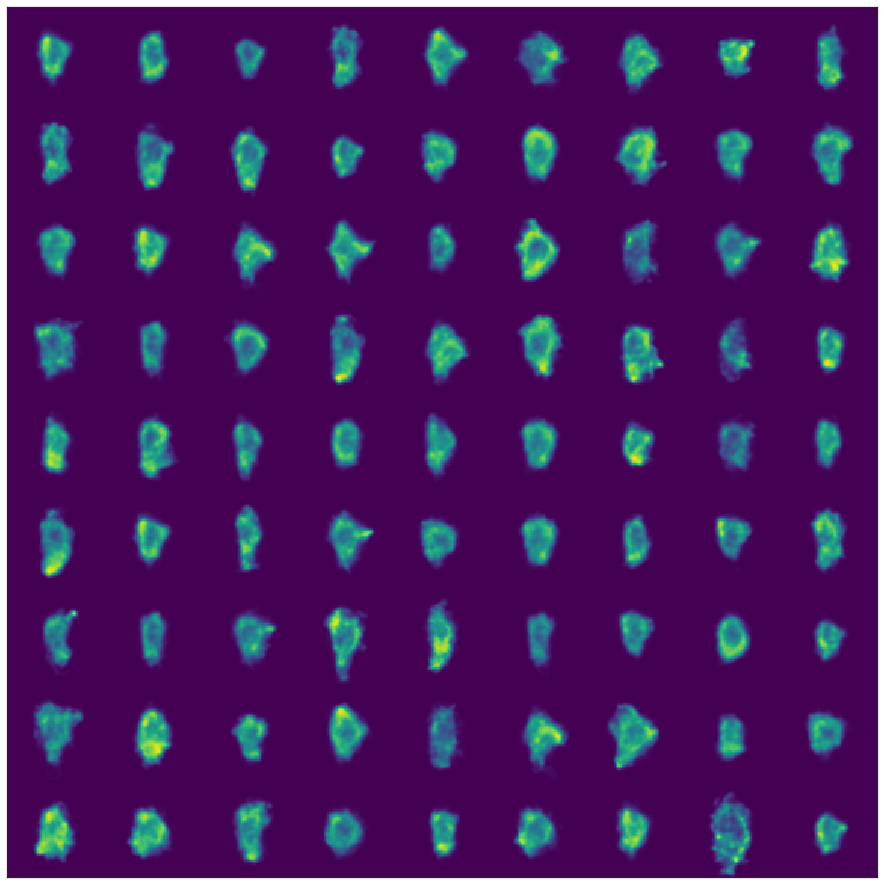

In [0]:
## Generate a random sample in latent space
n = 9
z = torch.randn(int(n**2), 2)

outs = model.decode(z.cuda())
outs = outs.view(-1, 1, 64, 64).cpu().detach()
print(outs.size())

sz = 64 # px
V = np.zeros((sz*n, sz*n))
for i in range(int(n**2)):
  O = outs[i,...].squeeze().numpy().copy()
  V[(i//n*sz):((i//n)+1)*sz, (i%n)*sz:((i%n)+1)*sz] = O

plt.figure(None, (16,16))
plt.imshow(V, cmap='viridis')
plt.xticks([])
plt.yticks([])

### Plot each sample in the $z$ latent embedding

In [0]:
# Plot the embedding of our latent space 

Z = np.zeros((len(cds), 2))
V = np.zeros((len(cds), 2))
for i in range(len(cds)):
  x_i = cds[i]['image']
  x_i = x_i.unsqueeze(0).cuda() # add batch dim 1, move to GPU

  x_hat, mu, logvar = model(x_i)
  mu = mu.detach().cpu().squeeze().numpy()
  var = logvar.detach().cpu().exp().squeeze().numpy()
  Z[i,:] = mu
  V[i,:] = var
  
print(Z.shape)
print(V.shape)

(542, 2)
(542, 2)


Z means: [ 0.00679461 -0.06350324]
Z stds : [1.32271078 1.45525398]


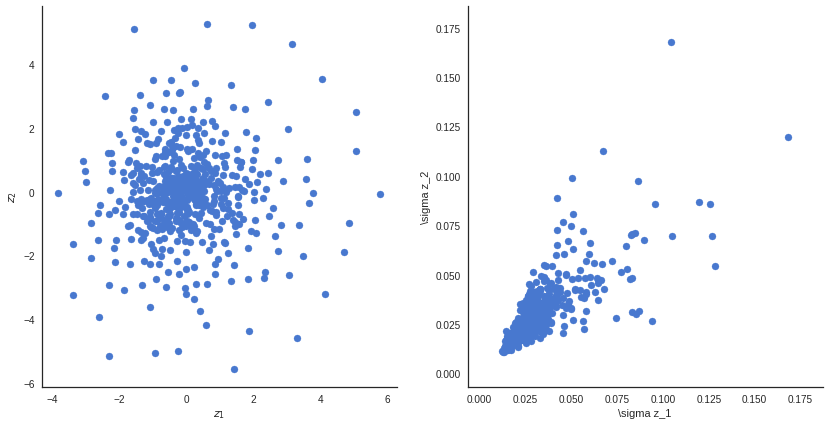

In [0]:
fig, ax = plt.subplots(1,2,figsize=(14,7))
ax[0].scatter(Z[:,0], Z[:,1])
ax[0].set_xlabel(r'$z_1$')
ax[0].set_ylabel(r'$z_2$')
sns.despine()
ax[1].scatter(np.sqrt(V[:,0]), np.sqrt(V[:,1]))
ax[1].set_xlabel(r'\sigma z_1')
ax[1].set_ylabel(r'\sigma z_2')
sns.despine()

print('Z means:', Z.mean(0))
print('Z stds :', Z.std(0))

We see that our embedding $z$ resembles a univariate Gaussian with some slight deviations. These deviations reflect a compromise between the best possible reconstruction and a latent representation that exactly fits $z \sim \mathcal{N}(0,1)$.

We also see that some samples have much higher variation than others. Let's plot some extreme examples to get an idea of why that is.

Text(0.5,1,'Low Variance')

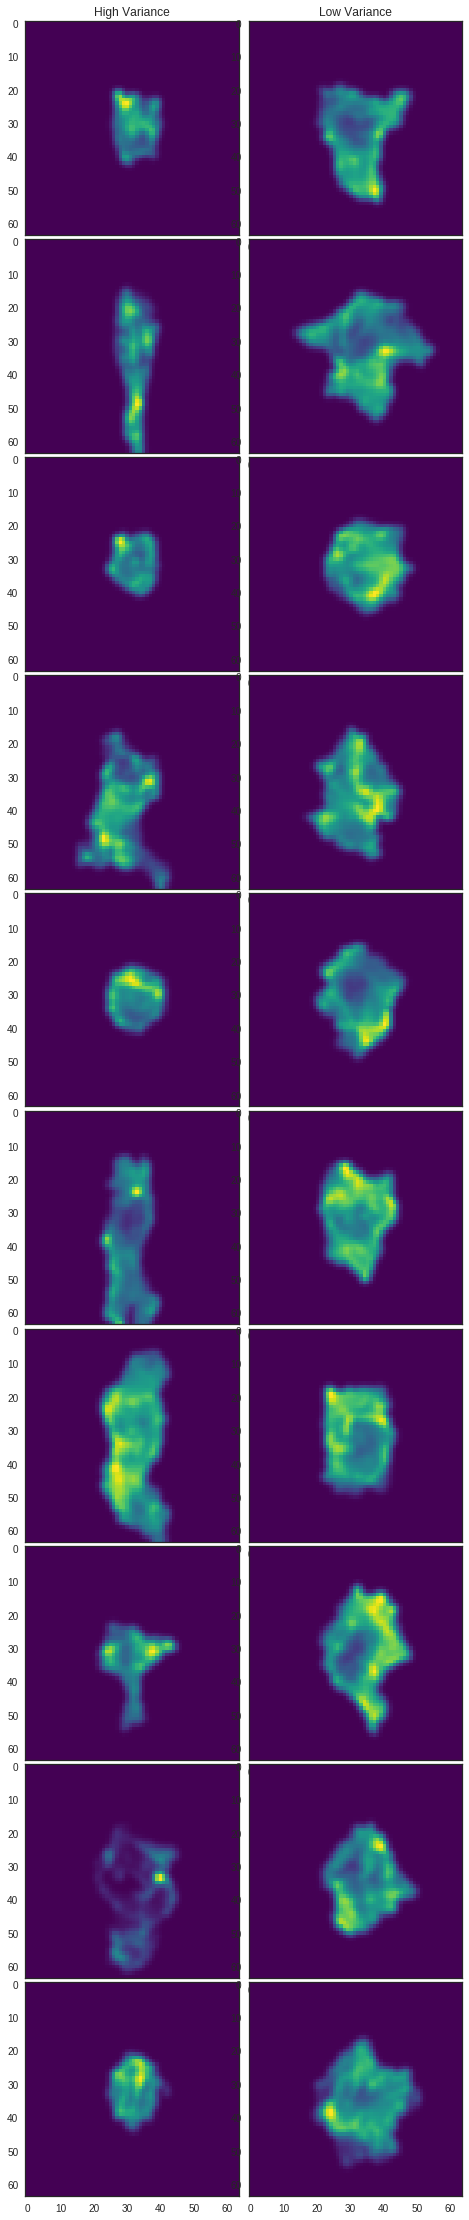

In [0]:
S = np.sqrt(V).sum(1)
high_var_idx = S.argsort()[-10:][::-1]

low_var_idx = S.argsort()[:10][::-1]

fig, ax = plt.subplots(10, 2, figsize=(8, 40))
fig.subplots_adjust(hspace=0.020, wspace=0.00005) # rm space between subplots
for i, j in enumerate(high_var_idx):
  I = cds[j]['image'].squeeze().numpy()
  ax[i, 0].imshow(I, cmap='viridis')
for i, j in enumerate(low_var_idx):
  I = cds[j]['image'].squeeze().numpy()
  ax[i, 1].imshow(I, cmap='viridis')
  
ax[0, 0].set_title('High Variance')
ax[0, 1].set_title('Low Variance')

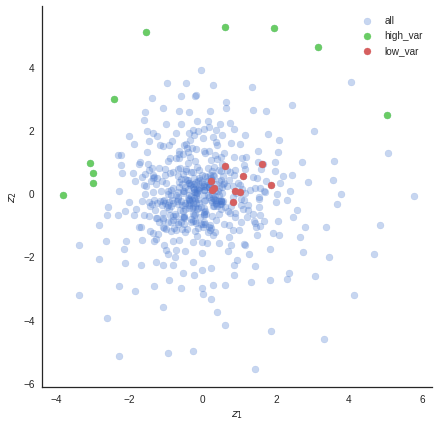

In [0]:
fig, ax = plt.subplots(1,1,figsize=(7,7))
ax.scatter(Z[:,0], Z[:,1], label = 'all', alpha = 0.3)
ax.scatter(Z[high_var_idx, 0], Z[high_var_idx, 1], label='high_var')
ax.scatter(Z[low_var_idx, 0], Z[low_var_idx, 1], label='low_var')
plt.legend(bbox_to_anchor=(1.,1.))
ax.set_xlabel(r'$z_1$')
ax.set_ylabel(r'$z_2$')
sns.despine()

We see that our high variance cells map to unique points on the edge of the latent space. These are rare examples with few neighbors in the data set. By contrast, low variance cells map fairly uniquely to points near the mean.

### Mapping our latent space with images

In addition to just random samples, we can map our latent space by sampling uniformly along the dimensions. Here we take $n$ samples along each of our dimensions and generate latent variables with all possible combinations. 

Using our decoder $p_{decoder}(x_i | z)$, we can visualize the latent space representation as a matrix of images and assign some semantic understanding to each latent dimension. 

In the matrix below, the center cell is the coordinate $(\mu_{z_0}, \mu_{z_1})$.

Latent size: [Batch, LatentDims] torch.Size([169, 2])
torch.Size([169, 1, 64, 64])


([], <a list of 0 Text yticklabel objects>)

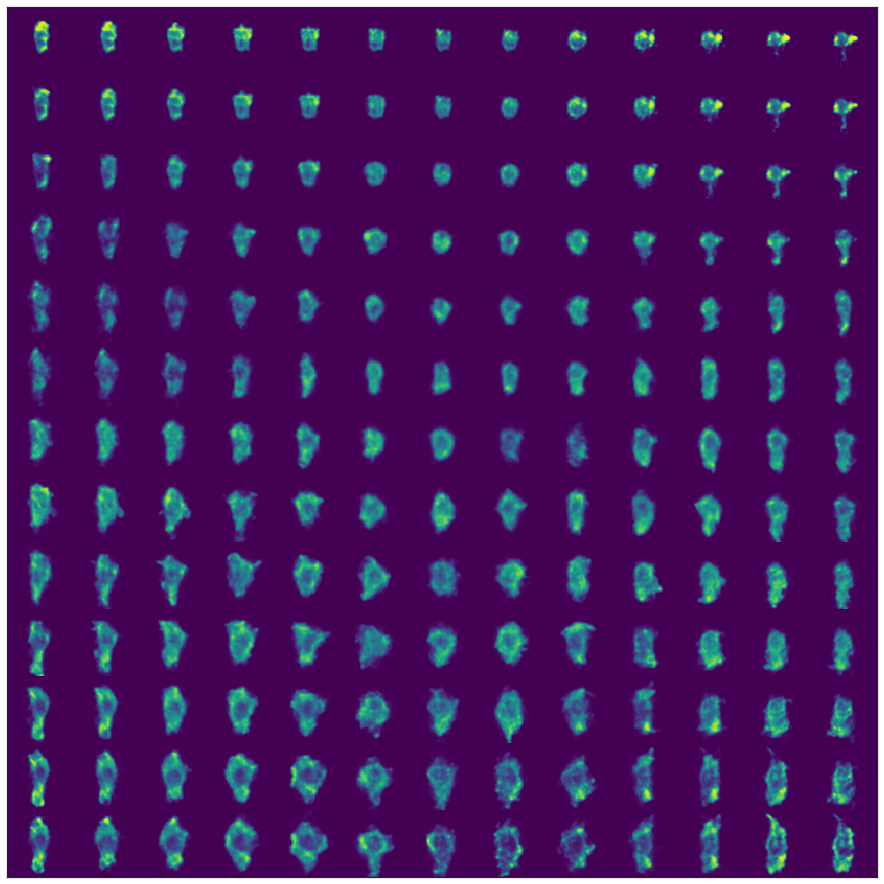

In [0]:
## Map latent space
import itertools
n = 13
sig = 4 # number of standard deviations from the mean to sample
z0 = np.linspace(-sig, sig, n) # make `n` evenly spaced samples in each dimension
z1 = np.linspace(-sig, sig, n)
# get the product of those sets for all possible combinations
z = torch.from_numpy(np.array(list(itertools.product(z0, z1)))).float()
print('Latent size: [Batch, LatentDims]', z.size())

outs = model.decode(z.cuda()) # decode the latent means
outs = outs.view(-1, 1, 64, 64).cpu().detach()
print(outs.size())

sz = 64 # px
V = np.zeros((sz*n, sz*n))
for i in range(int(n**2)):
  O = outs[i,...].squeeze().numpy().copy()
  V[(i//n*sz):((i//n)+1)*sz, (i%n)*sz:((i%n)+1)*sz] = O

plt.figure(None, (16,16))
plt.imshow(V, cmap='viridis')
plt.xticks([])
plt.yticks([])

We can see that for this particular model, our latent space seems to have encoded one dimension for something like "$\text{Size} \propto \text{Circularity}^{-1}$" (the $y$ axis above) and one for something like "sparsity" of $\beta$-actin within the cell shape (the $x$-axis above).

Perhaps most strikingly, the representation above seems to be largely coherent, with neighboring regions or the latent space demonstrating remarkable similarity in their reconstructed outputs.

### Visualize the probability distribution for individual samples

Remember, the encoding we make from $x_i$ to $z$ using $q_{encoder}(z | x_i)$ returns the parameters of a Gaussian distribution, rather than an explicit mapping.

Given this parameterization, we can visualize the *distribution* of $\hat x_i$, in addition to just visualizing it's mean. 

We visualize the distribution below as a matrix of images, highlighting the mean with a frame.

torch.Size([1, 64, 64])
Sample latent dimension means:  [-0.9379986   0.06752452]
Sample latent dimension var [0.00076175 0.00067355]
torch.Size([121, 1, 64, 64])


[]

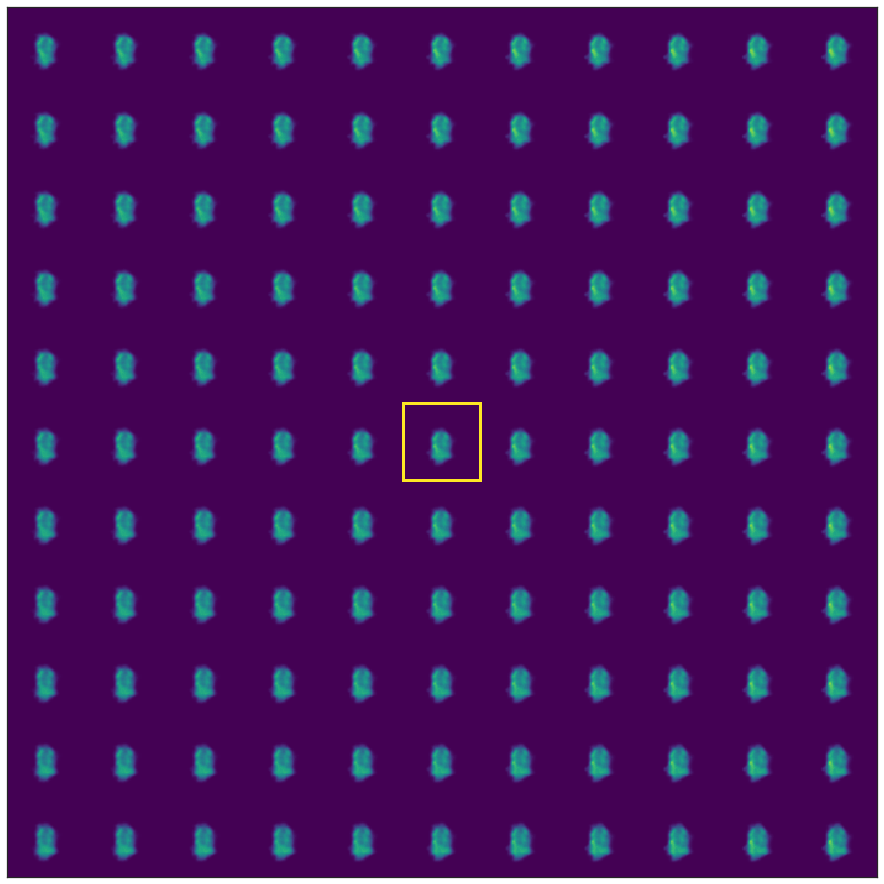

In [0]:
# get a single example from the data set

x_i = cds[99]['image'] # pick your favorite index :)
print(x_i.size())

x_i = x_i.unsqueeze(0).cuda() # add batch dim 1, move to GPU

x_hat, mu, logvar = model(x_i)
mu = mu.detach().cpu().squeeze().numpy()
logvar = logvar.detach().cpu()
var = torch.exp(logvar).squeeze().numpy()
print('Sample latent dimension means: ', mu)
print('Sample latent dimension var', var)

sigs = 3 # deviations to plot
n = 11 # number of samples in each dimension
zs = []
for i in range(2):
  zs += [np.linspace(mu[i] - sigs*np.sqrt(var[i]), mu[i] + sigs*np.sqrt(var[i]), n)]
  
z = torch.from_numpy(np.array(list(itertools.product(zs[0], zs[1])))).float()

outs = model.decode(z.cuda()) # decode the latent means
outs = outs.view(-1, 1, 64, 64).cpu().detach()
print(outs.size())

frame = 2 # size of frame around mean prediction in pixels
sz = 64 # px
V = np.zeros((sz*n, sz*n))
for i in range(int(n**2)):
  O = outs[i,...].squeeze().numpy().copy()
  if (i%n) == (n//2) and (i//n)==(n//2):
    O[:frame, :] = 1
    O[-frame:,:] = 1
    O[:, :frame] = 1
    O[:,-frame:] = 1
  V[(i//n*sz):((i//n)+1)*sz, (i%n)*sz:((i%n)+1)*sz] = O

fig, ax = plt.subplots(1,1, figsize=(16,16))
ax.imshow(V, cmap='viridis')
ax.set_xticks([])
ax.set_yticks([])


# References

Variational inference: A review for statisticians

https://arxiv.org/abs/1601.00670

Autoencoding Variation Bayes, Kingma & Welling  
https://arxiv.org/pdf/1312.6114.pdf

Tutorial on Variational Autoencoders, Carl Doersch  
https://arxiv.org/abs/1606.05908

Generative Modeling with Conditional Autoencoders: Building an Integrated Cell, Gregory Johnson et al  
https://arxiv.org/pdf/1705.00092.pdf

Hidden Talents of the Variational Autoencoder, Bin Dai et. al.  
https://arxiv.org/pdf/1706.05148.pdf

A more NN-y tutorial with helpful analogies between classical VI and NNs

https://jaan.io/what-is-variational-autoencoder-vae-tutorial/

# Appendix 

In [0]:
# Convolutional alternative model
dropout_prob = 0.3
class VAE(nn.Module):
  def __init__(self, in_size=64, n_latent=64):
    super(VAE, self).__init__()
    self.in_size = in_size
    self.n_latent = n_latent
    
    self.encoder = nn.Sequential(
      # output_sz = [(input_sz + 2*padding - kernel_size) / stride] + 1
      # output_sz = I/2 ; padding=1, kernel_size = 4, stride = 2
      # https://arxiv.org/pdf/1603.07285.pdf
      nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
      nn.LeakyReLU(inplace=True),
      nn.Conv2d(32, 8, kernel_size=4, stride=2, padding=1), # 1/2 sz
      nn.LeakyReLU(inplace=True),
    )
    
    self.fc_mu = nn.Linear(8*(self.in_size//2)**2, self.n_latent)
    self.fc_sd = nn.Linear(8*(self.in_size//2)**2, self.n_latent)    

    self.fc_00 = nn.Linear(self.n_latent, int(8*(self.in_size//2)**2))
    
    self.decoder = nn.Sequential(
        # output_sz = stride(input_sz - 1) + kernel_sz - 2*padding
        # output_sz = 2*input_sz ; stride=2, kernel_sz=2, padding=1
        # https://arxiv.org/pdf/1603.07285.pdf
        nn.ConvTranspose2d(8, 32, kernel_size=4, 
                           stride=2, padding=1), # 1/1 sz
        nn.LeakyReLU(inplace=True),
        nn.ConvTranspose2d(32, 32, kernel_size=3, 
                           stride=1, padding=1),
        nn.LeakyReLU(inplace=True),
        nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
        nn.LeakyReLU(inplace=True),
        nn.Conv2d(32, 1, kernel_size=3, stride=1, padding=1),
        nn.Sigmoid(),
    )
    
  def reparam(self, x):
    mu = self.fc_mu(x)
    logvar = self.fc_sd(x)
    sd = torch.exp(0.5*logvar)
    eps = torch.randn_like(sd)
    if self.training:
      z = mu + torch.mul(eps, sd)
    else:
      z = mu
    return z, mu, logvar
  
  def forward(self, x):
    x_enc = self.encoder(x)
    z, mu, logvar = self.reparam( x_enc.view(-1, np.prod(x_enc.size()[1:])) )
    x_lin = self.fc_00(z)
    x_dec = self.decoder(x_lin.view(-1, 8, self.in_size//2, self.in_size//2))
    return x_dec, mu, logvar